# Исследование игровых платформ.

# Описание проекта
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.


Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.


В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».


## Описание данных
Name — название игры


Platform — платформа


Year_of_Release — год выпуска


Genre — жанр игры


NA_sales — продажи в Северной Америке (миллионы долларов)


EU_sales — продажи в Европе (миллионы долларов)


JP_sales — продажи в Японии (миллионы долларов)


Other_sales — продажи в других странах (миллионы долларов)


Critic_Score — оценка критиков (максимум 100)


User_Score — оценка пользователей (максимум 10)


Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

### Шаг 1. Ознакомление с данными

In [195]:
# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math 
from scipy import stats as st
import warnings
warnings.filterwarnings('ignore')

In [196]:

try:
    games = pd.read_csv('/datasets/games.csv')
except:
    games = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')


In [197]:
# Выводим первые 20 строк датафрейма на экран
games.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [198]:
# Выводим основную информацию датафрейма методом info()
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Подведем итог по первому взгляду на имеющиеся данные. Мы выгрузизи таблицу и присвоили её переменной games, импортировали необходимые для анализа библиотеки. При помощи метода info() проверили какие типы данных в каждом столбце датафрейма и выяснили, что в двух столбцах,Year_of_Release и User_Score, необходимо изменить тип данных.

1. Нужно привести названия столбцов к нижнему регистру.
2. В столбце Year_of_Release нам нужно изменить тип данных с float на int.
3. В столбце User_Score следует изменить тип данных с object на float.
4. В столбце Critic_Score обнаружены пропущенные значения. 
5. В столбце User_Score обнаружены пропущенные значения.
6. В столбце Rating обнаружены пропущенные значения. 


### Шаг 2. Подготовка данных

In [199]:
# Названия столбцов приведем к нижнему регистру (применяем метод str.lower())
games.columns = games.columns.str.lower()
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [200]:
# Посмотрим на колличество пропущенных значений для каждого столбца
games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [201]:
games['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [202]:
# Поработаем со столбцом year_of_release
# Для начала посчитаем колличество пропусков
games['year_of_release'].isna().sum()

269

In [203]:
# Посмотрим у каких игр не указан год релиза.
games.sort_values('year_of_release', ascending=True)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1764,Kaboom!,2600,1980.0,Misc,1.07,0.07,0.0,0.01,NaN,NaN,NaN
546,Missile Command,2600,1980.0,Shooter,2.56,0.17,0.0,0.03,NaN,NaN,NaN
1968,Defender,2600,1980.0,Misc,0.99,0.05,0.0,0.01,NaN,NaN,NaN
6300,Bridge,2600,1980.0,Misc,0.25,0.02,0.0,0.00,NaN,NaN,NaN
6875,Checkers,2600,1980.0,Misc,0.22,0.01,0.0,0.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.0,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.0,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.0,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.0,0.00,NaN,NaN,NaN


In [204]:
# Попробуем взять одну из игр с неуказанным годом и проверить выпускалась ли она на других платформах
games.query('name == "PDC World Championship Darts 2008"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
6917,PDC World Championship Darts 2008,Wii,2008.0,Sports,0.02,0.21,0.0,0.01,51.0,5.4,E10+
15953,PDC World Championship Darts 2008,DS,NaN,Sports,0.01,0.00,0.0,0.00,NaN,NaN,NaN
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.0,0.00,43.0,tbd,E10+


In [205]:
# Как и ожидалось, на другой платформе год релиза есть, а значит с помощью этой информации можно попробовать
# заполнить пропуски за счет наличия информации об этих играх, выпущенных для разных платформ
# Возможно все пропуски заполнить не получится, но все же мы сократим их колличество 

for i in games[games['year_of_release'].isnull() == True].index:
    games['year_of_release'][i] = games.loc[games['name'] == games['name'][i], 'year_of_release'].max()

In [206]:
# Теперь проверим еще раз сколько пропусков осталось
games['year_of_release'].isna().sum()

146

Думаю, что больше мы тут ничего сделать не сможем. Оставим эти пропуски как есть.

In [208]:
# Избавимся от двух пропусков в столбце name
games = games.dropna(subset = ['name'])

В столбце name указаны названия игр. Применить к нему метод mean() или median() (среднее или медиана) мы не можем. Оставить пропуски тоже нельзя, ведь тогда непонятно о какой игре идет речь. Поэтому следует принять решение удалить эти 2 строки. В противном случае они могут повлиять на статистику. 

Касательно причины появления пропуска можно предположить, что название либо просто забыли указать в процессе заполнения данных, либо же игра вообще не имеет официальное название.

In [209]:
games = games.dropna(subset = ['genre'])

В столбце genre ситуация аналогичная. Привести к какому - либо значению мы не можем, удаляем строки с пропусками. 

Эти пропуски могли появиться по нескольким причинам: их просто забыли указать при заполнении, не смогли определить к какому жанру стоит отнести эти игры.

In [210]:
# Проверим оставшиеся пропуски
games.isna().sum()

name                  0
platform              0
year_of_release     146
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

In [211]:
# Вызовем уникальные значения в столбце critic_score методом unique()
games['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [212]:
# Вызовем уникальные значения в столбце user_score методом unique()
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В этом столбце мы обнаружили аббревиатуру 'tbd', что означает "рейтинг не определен". Из- за неё при выводе мотода info тип столбца показан как object, а нам нужно изменить его на float. Заменим 'tbd' на NaN. Исследованию это помешать не должно.

In [213]:
# Напишем функцию для замены 'tbd' на NaN
def replace_tbd(user_score, new_score):
    games['user_score'] = games['user_score'].replace(user_score, new_score)

replace_tbd('tbd', np.nan)

# Изменим тип данных в столбце user_score
games['user_score'] = games['user_score'].astype('float')

In [214]:
# Вызовем уникальные значения в столбце rating методом unique()
games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

С пропусками в столбцах critic_score и rating мы пока ничего не можем сделать тк эти данные могут еще нам пригодиться для анализа, оставляем их как есть. Возможно это какие - то новые игры, которые еще не успели получить оценку критиков и пользователей. 

А вот со значениями 'E10+' и 'K-A' в столбце rating, поработать можем.

'K-A' означает игры для детей и взрослых ("Kids to Adults").

'E10+' означает игры для детей от 10 лет и старше.

Для удобства заменим 'K-A' на 'E10+'

In [215]:
# Снова воспользуемся функцией для замены значений
# Напишем функцию для замены 'K-A' на 'E10+'
def replace_rating(old_rating, new_rating):
    games['rating'] = games['rating'].replace(old_rating, new_rating)

replace_rating('K-A', 'E10+') 

games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'AO', 'EC', 'RP'], dtype=object)

In [216]:
# Напишем функцию для замены пропусом в столбце rating с nan на "unknown" и в 4й части посмотрим как новая категория влияет на анализ
def replace_rating(pass_rating, new_rating):
    games['rating'] = games['rating'].replace(pass_rating, new_rating)
    
replace_rating(np.NaN, 'unknown')


In [217]:
# Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']


### Шаг 3. Исследовательский анализ данных

#### Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [218]:
# Определим максимальный год в данных
games['year_of_release'].max()

2016.0

In [219]:
# Определим минимальный год в данных
games[games['year_of_release'] > 0]['year_of_release'].min()

1980.0

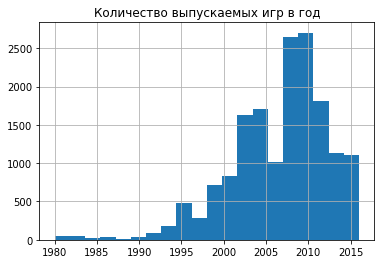

In [220]:
# Проанализируем колличество выпускаемых игр за весь период 
games['year_of_release'].hist(bins = 20, range=(1980, 2016))
plt.title('Количество выпускаемых игр в год')
plt.show()

In [221]:
# Сделаем разбивку примерно по 7 лет тк это средний срок жизни платформы

<AxesSubplot:>

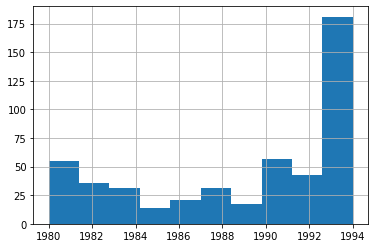

In [222]:
games['year_of_release'].hist(bins = 10, range=(1980,1994))

<AxesSubplot:>

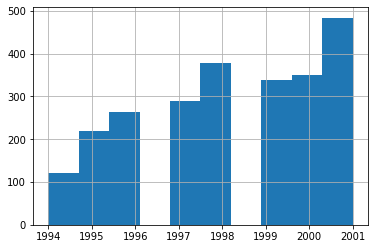

In [223]:
games['year_of_release'].hist(bins = 10, range=(1994, 2001))

<AxesSubplot:>

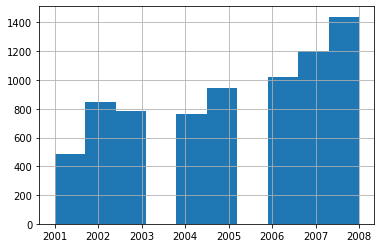

In [224]:
games['year_of_release'].hist(bins = 10, range=(2001, 2008))

<AxesSubplot:>

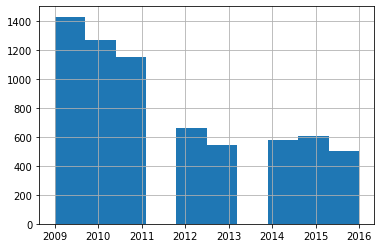

In [225]:
games['year_of_release'].hist(bins = 10, range=(2009, 2016))

Вывод:

По графикам видно, что с начала 90-х годов начинается активрый рост развития игровой индустрии.
С 1994 года стали регулярно выходить обновления для приставок, с интервалом 6-7 лет. Исходя из этого мы можем объеденить года с 1980 по 1993 потому что до 1994 года новые игры выходили очень редко и без какой - либо четкой периодичности. В целом данные до 1994 года нам не важны.
7 лет это средний срок жизни платформы. Гистограммы построены опираясь на этот период.
По графикам четко прослеживается динамика развития игровой индустрии, начиная с 2006г по 2011г выпускается больше всего игр. 

Данные по всем периодам для нашего исследования не важны. Нам понадобятся данные только за последние несколько лет. Возьмем актуальный период с 2013г по 2016г.


#### Посмотрим, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

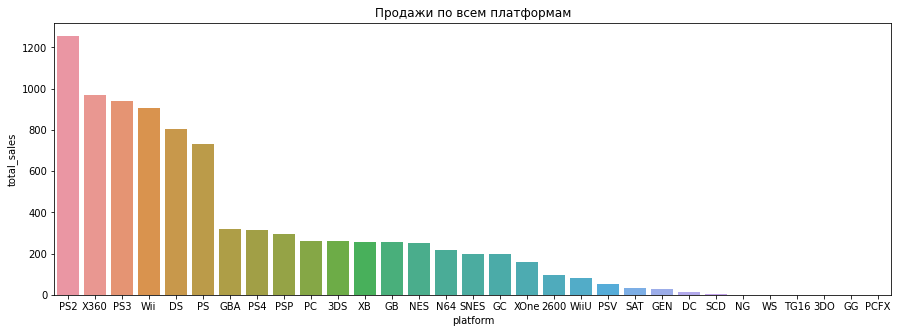

In [226]:
# Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими продажами.
# Построим график зависимости колличества продаж от платформы с помощью сводных таблиц 
platform_sales = games.pivot_table(index = 'platform',values = 'total_sales', aggfunc = 'sum').sort_values('total_sales', ascending = False)
platform_sales.sort_values('total_sales', ascending = False)

plt.figure(figsize = (15,5))
sns.barplot(x = platform_sales.index, y = platform_sales['total_sales'])
plt.title('Продажи по всем платформам')
plt.show()

Судя по графику самые популярные игровые платформы это: PS2, X360, PS3, WII, DS и PS.

In [227]:
# Обновим индексацию
platform_top = platform_sales.reset_index()
platform_top

,platform,total_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12
5,PS,730.86
6,GBA,317.85
7,PS4,314.14
8,PSP,294.05
9,PC,259.52


In [228]:
# Выведем список всех уникальных значений из столбца platform
platform_top_names = platform_top['platform'].unique()
platform_top_names

array(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC',
       '3DS', 'XB', 'GB', 'NES', 'N64', 'SNES', 'GC', 'XOne', '2600',
       'WiiU', 'PSV', 'SAT', 'GEN', 'DC', 'SCD', 'NG', 'WS', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

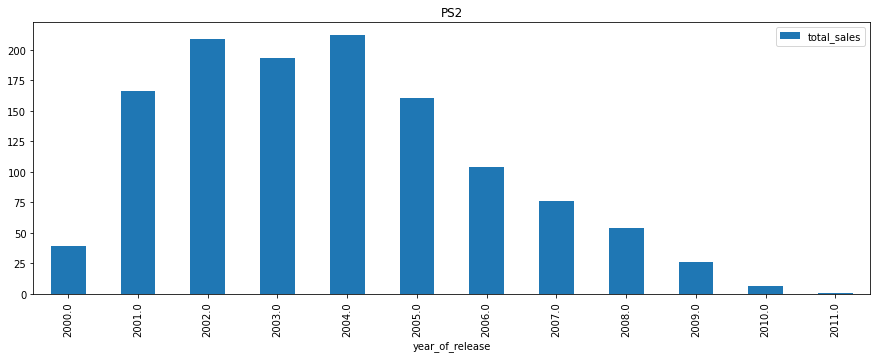

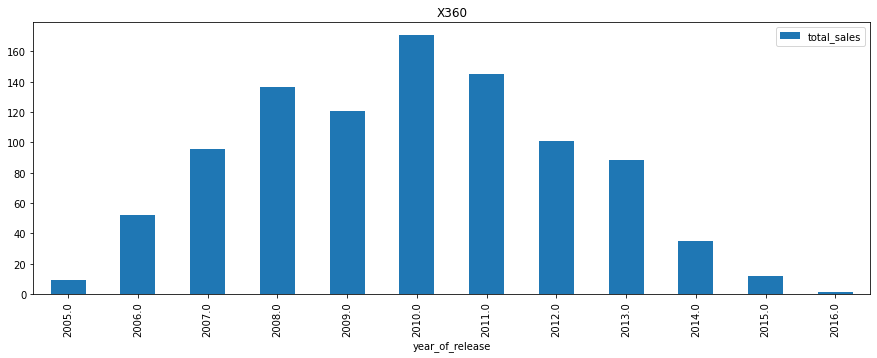

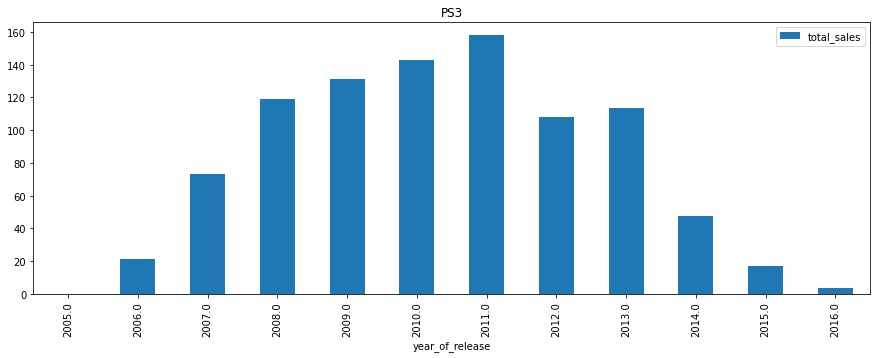

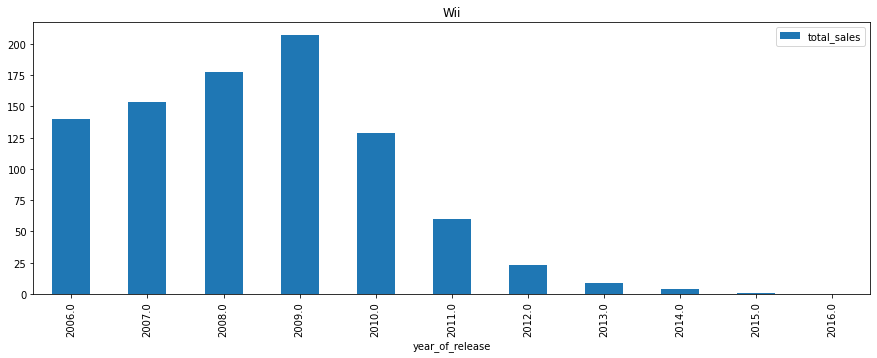

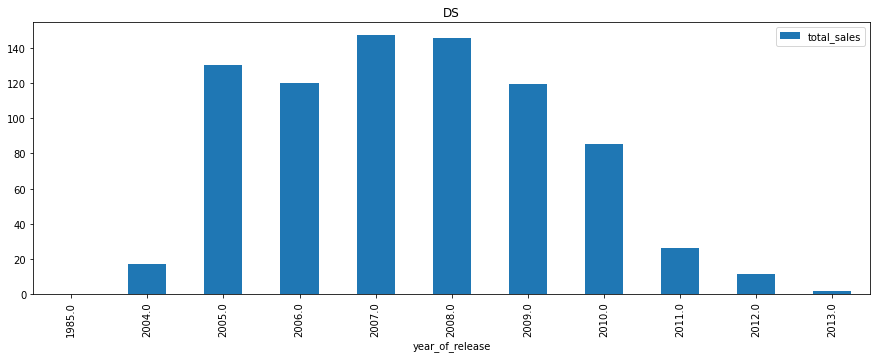

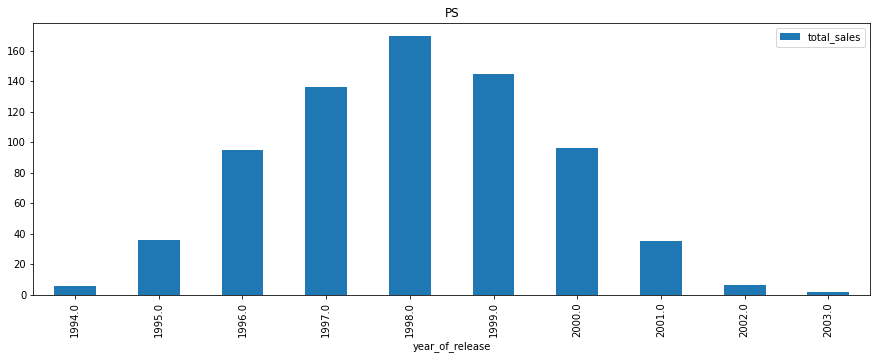

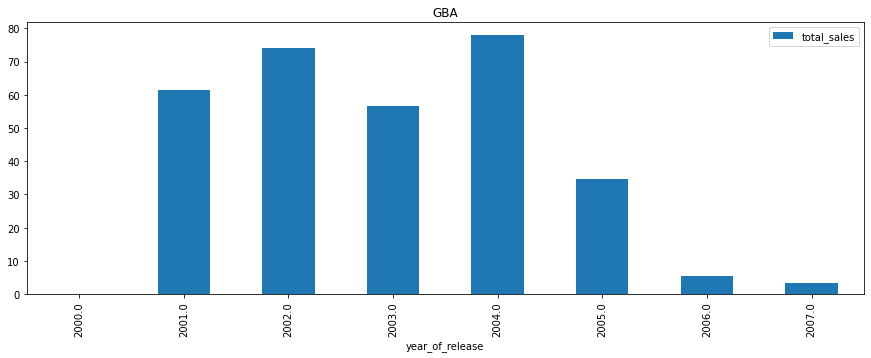

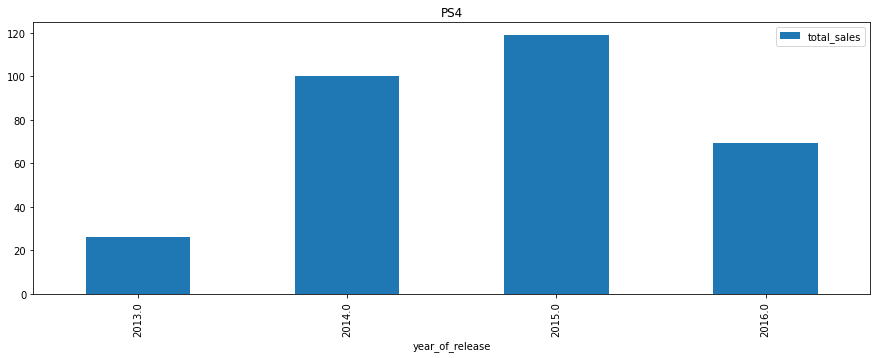

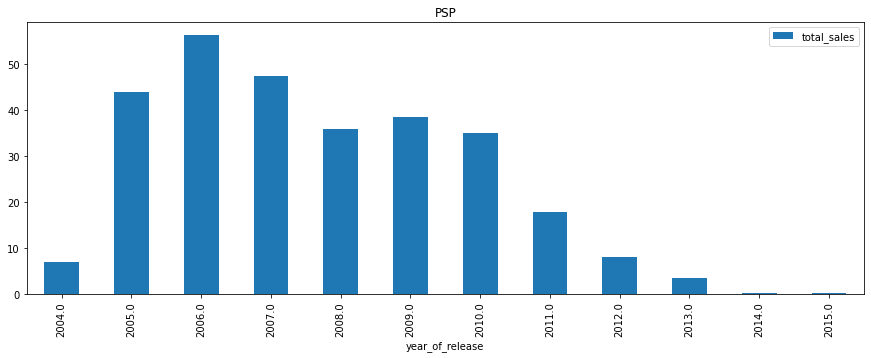

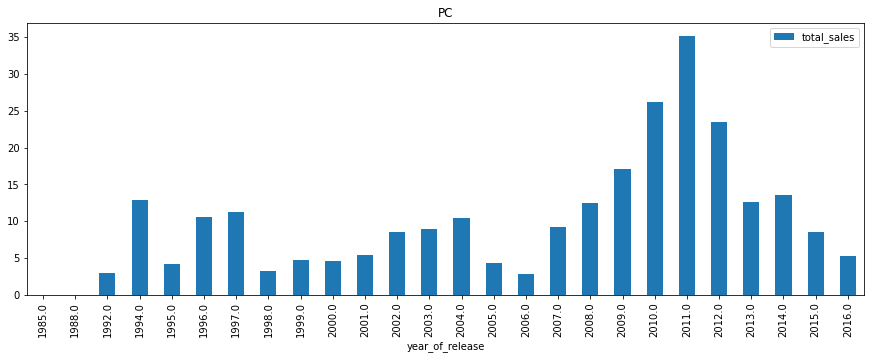

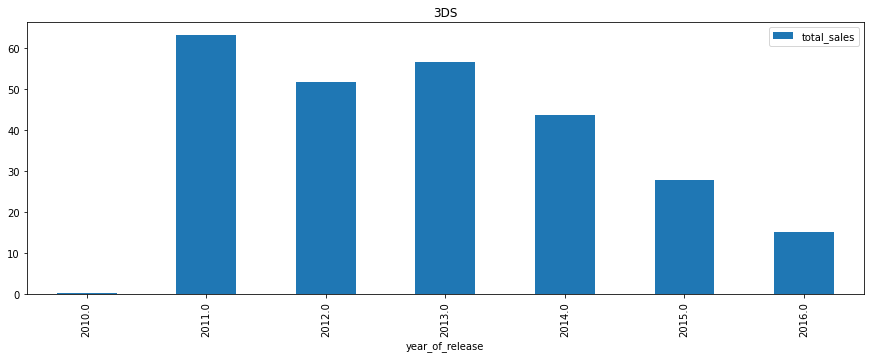

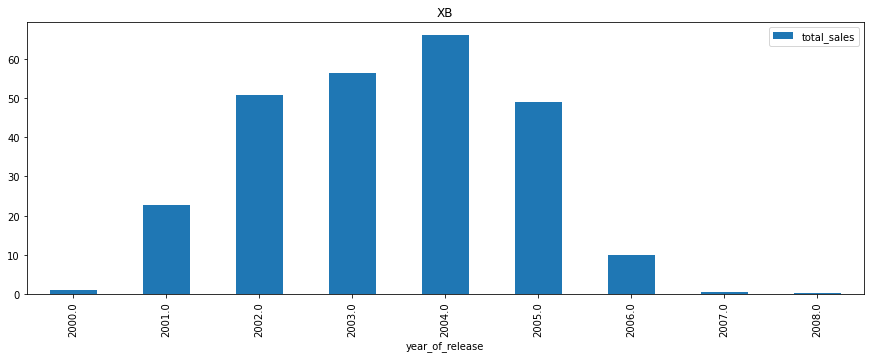

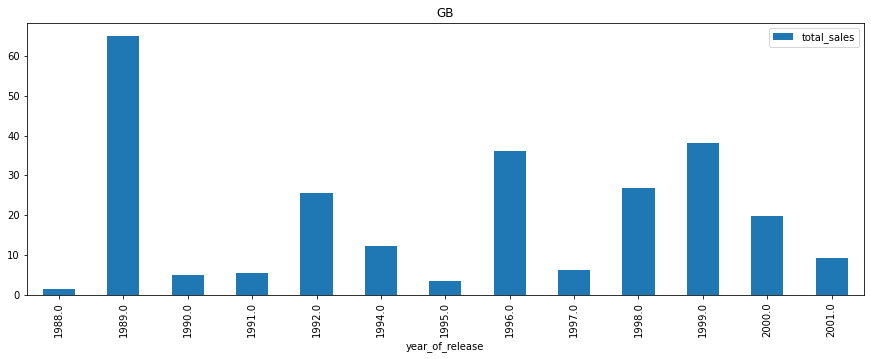

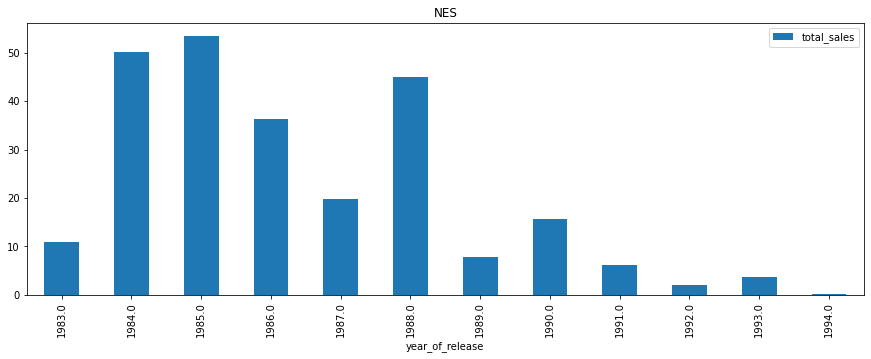

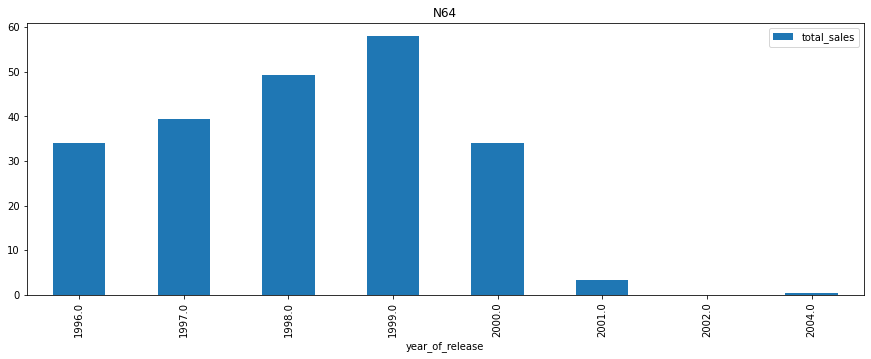

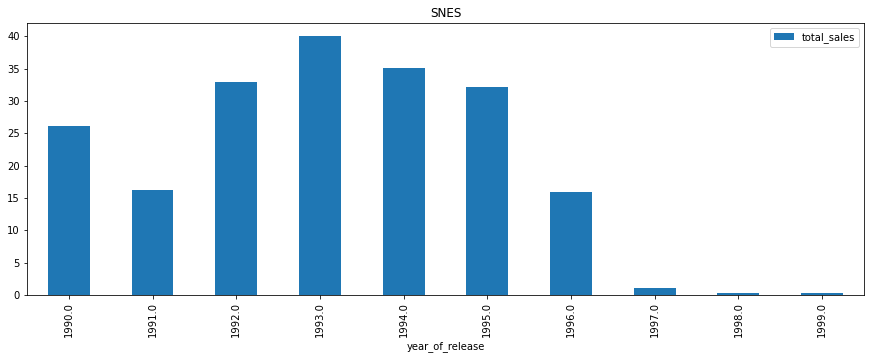

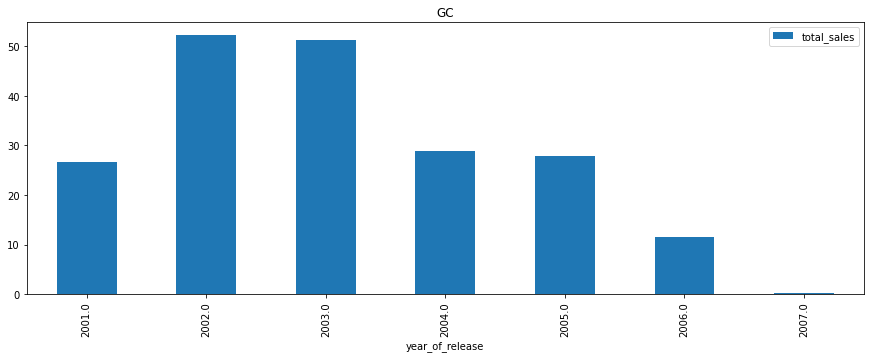

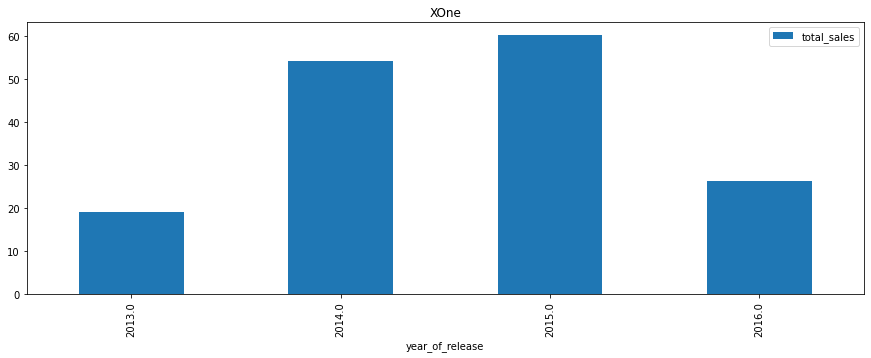

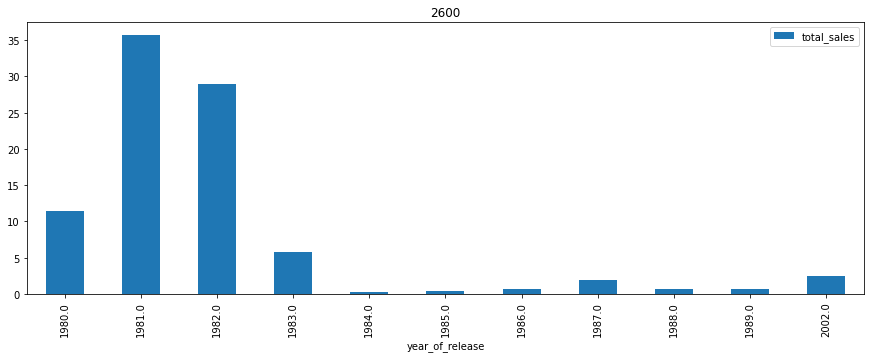

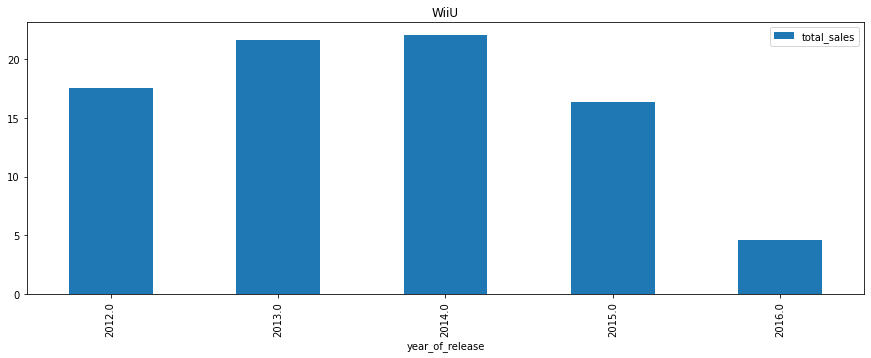

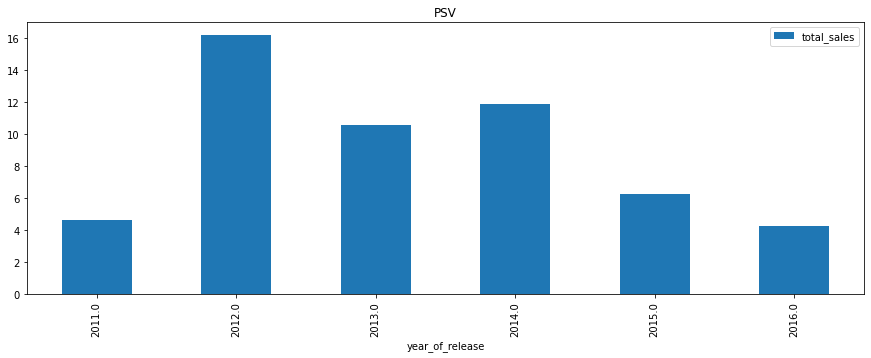

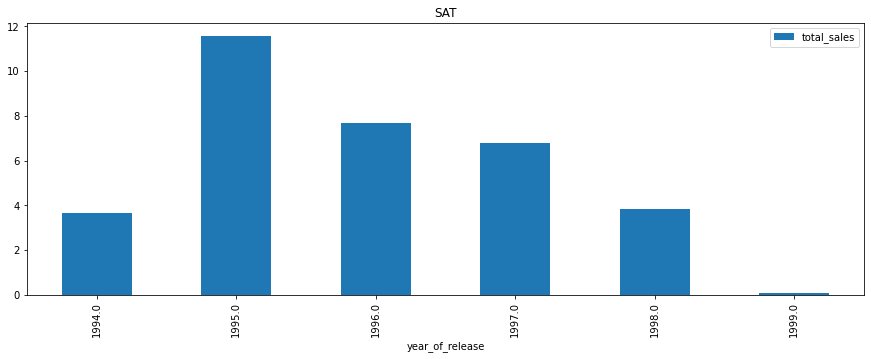

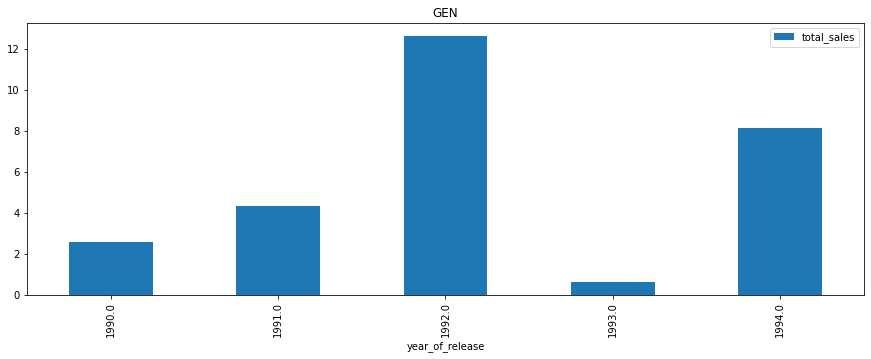

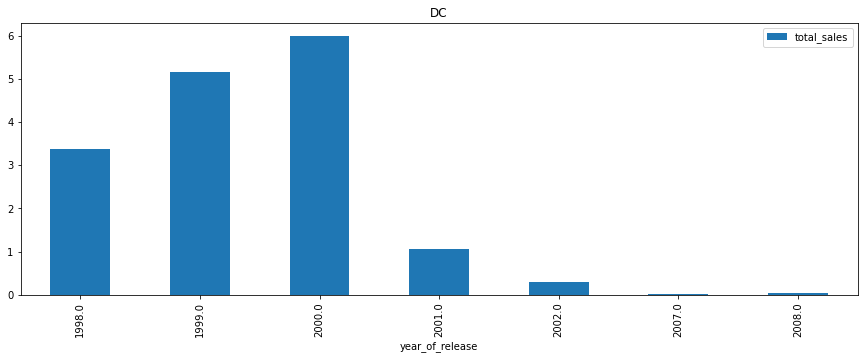

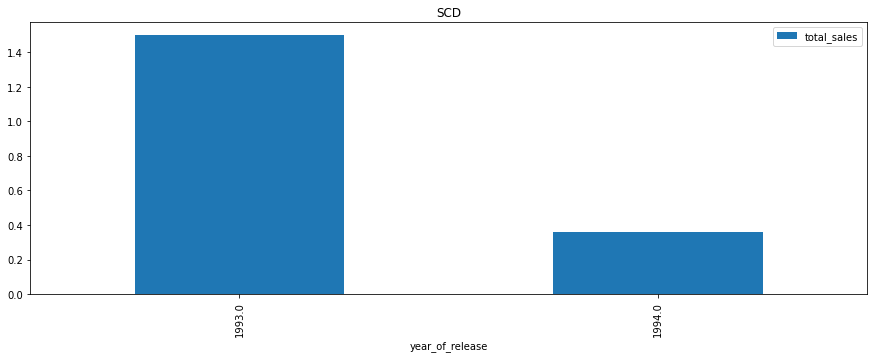

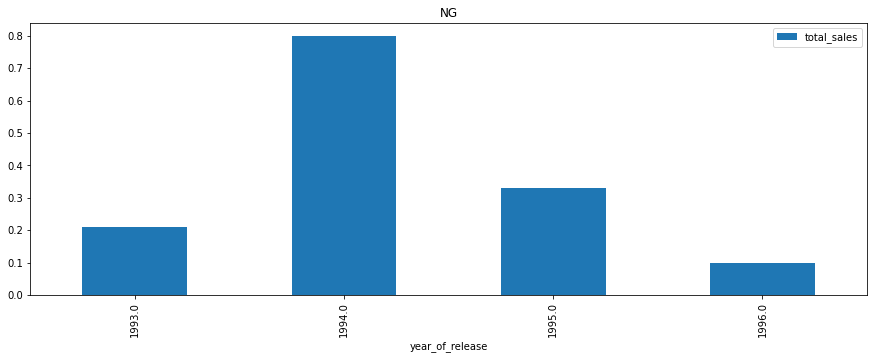

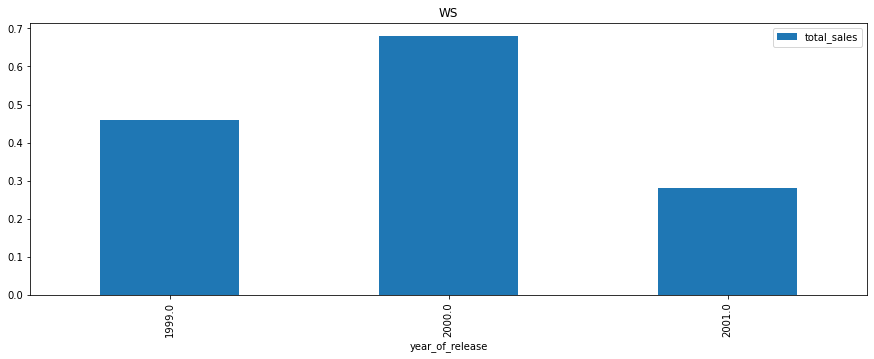

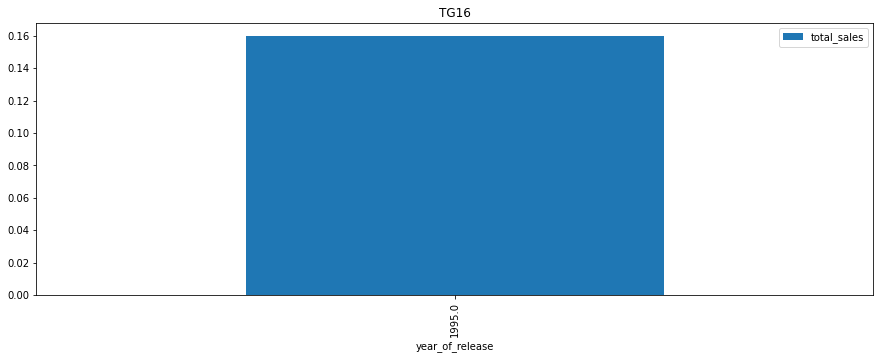

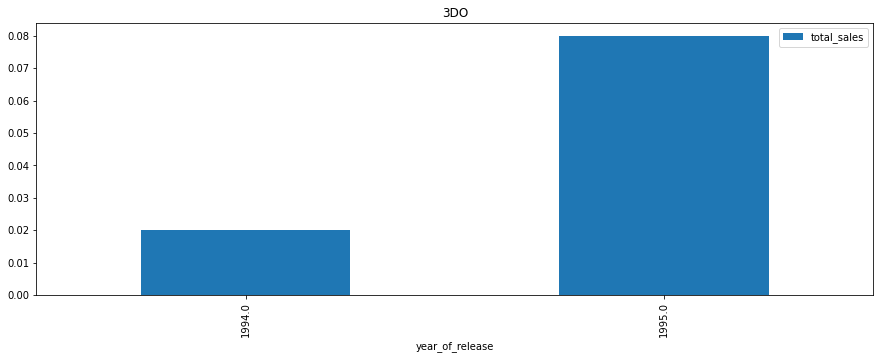

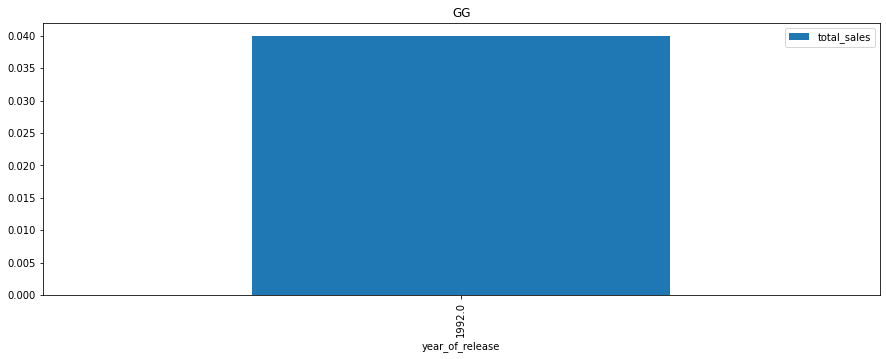

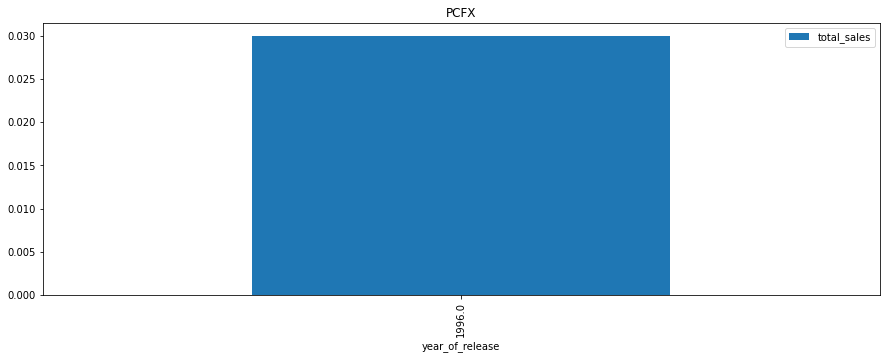

In [229]:
# Построим гистораммы по годам для каждой платформ
for name_platform in platform_top_names:
    games[games['platform'] == name_platform].pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum').plot(kind = 'bar', figsize=(15,5))
    plt.title(name_platform)

In [230]:
# Соберем в таблицу топ 5 платформ по их общим продажам за все время и отсортируем по убыванию количества продаж
platform_top_5 = games.pivot_table(
    index = ['platform'], values = 'total_sales', aggfunc = 'sum').sort_values(
    'total_sales', ascending = False).reset_index()
platform_top_5.head()

,platform,total_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12


Вывод. 

Опираясь на диаграмму распределения, можно сказать, что в среднем платформа живет от 8 до 10 лет. 

Топ 5 платформ, лидирующих в продажах за все время, теряют свою популярность к 2016 году.

Основная часть платформ из нашего списка уже не актуальна и остается всего несколько платформ: X360, PS3, PS4, PC, Nintendo 3DS, XOne, Nintendo WiiU, , PSV.

#### Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

Для начала определим актуальный период для дальнейшего исследования.

По гистограммам можно выделить 3 основных периода развития игровой индустрии:

- активный рост начиная с 2001г до 2008г.

- пик с 2008г по 2010г.

- сильный спад в последние несколько лет.

Так же мы можем наблюдать, что большей части платформ уже нет в 2016 году. Думаю это обусловлено тем, что гиганты игровой индустрии вытеснили более мелкие и устаревшие платформы.



In [231]:
# Сделаем новый датасет со срезом данных с 2013г по 2016г
actual_games = games.query('year_of_release >= 2013')
actual_games.reset_index(drop = True)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
3,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60
4,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
2232,Strawberry Nauts,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
2233,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
2234,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
2235,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01


Для анализа возьмем актуальный период с 2013 по 2016 год. 

Выбор этого периода обусловлен обновлением поколений платформ. Средний период обновлений 6 лет, а в ноябре 2013 года выходят две потенциально прибыльные платформы PS4 и XOne.

#### Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

<AxesSubplot:xlabel='year_of_release'>

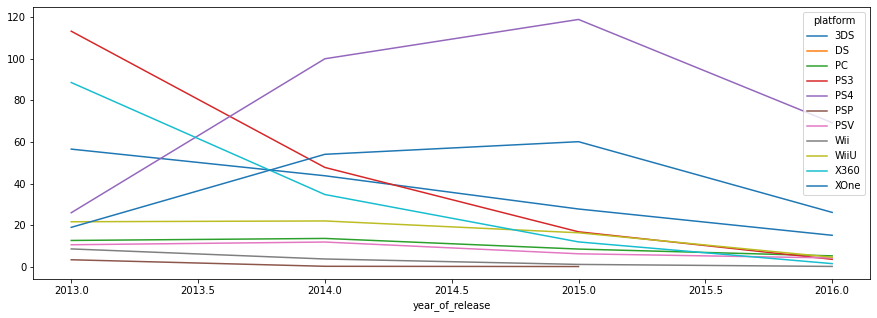

In [232]:
# Построим линейную диаграмму чтобы определить самые потенциально прибыльные платформы за выбранный период с 20013 года
actual_games.query('platform in @platform_top_5')
actual_games.pivot_table(index = 'year_of_release', columns = 'platform', values = 'total_sales', aggfunc = 'sum').plot(figsize=(15,5))


Вывод.

Все игры идут на резкое снижение продаж. По графику можно сделать вывод, что потенциально прибыльными платформами останутся PS4, XOne и 3DS, потому что только они демонстрируют хоть и не большие, но более стабильные продажи, чем все остальные платформы.

Самый резкий спад продаж у платформ PS3 и X360.

Все остальные консоли уже давно практически не пользуются спросом либо вовсе не продаются.

#### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

In [233]:
# Сделаем срез топ 5 платформ по актуальному периоду
actual_top_5 = actual_games.groupby(['platform'])['total_sales'].sum().nlargest(5)
# Обновим индексацию платформ и отфильтруем топ 5
actual_top_5_index = actual_top_5.index.tolist()
actual_top_5 = actual_games[actual_games['platform'].isin(actual_top_5_index)]

In [234]:
actual_top_5.pivot_table(
    index = 'name', columns = 'platform', values = 'total_sales', aggfunc = 'sum')
actual_top_5.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,694.000000,848.000000,1473.000000
mean,2014.529532,0.261521,0.226728,0.073299,0.073170,71.344380,6.506014,0.634718
std,1.080008,0.643654,0.610422,0.276397,0.199082,13.439979,1.582042,1.454708
min,2013.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.200000,0.010000
25%,2014.000000,0.000000,0.000000,0.000000,0.000000,64.250000,5.700000,0.050000
50%,2015.000000,0.050000,0.040000,0.010000,0.010000,74.000000,6.800000,0.170000
75%,2015.000000,0.240000,0.180000,0.050000,0.060000,80.750000,7.700000,0.580000
max,2016.000000,9.660000,9.090000,4.350000,3.960000,97.000000,9.200000,21.050000


(0.0, 2.0)

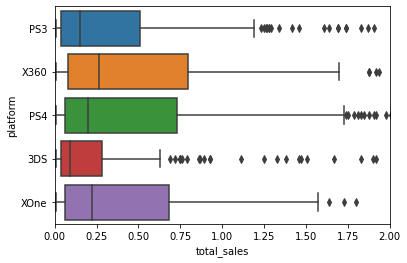

In [235]:
# Построим график "ящики с усами" по глобальным продажам игр среди топ 5-ти платформ
sns.boxplot(data=actual_top_5, x = actual_top_5['total_sales'], y = actual_top_5['platform'], orient='h')
plt.xlim(0,2)

Вывод:

Опираясь на график мы можем сделать вывод, что больше всего глобальных продаж было у платформ: X360, PS4 и XOne.

XOne и PS4 находятся практически на одном уровне. Объяснить это можно тем, что данные приставки вышли на рунок позднее всех остальных.

Так же по графику можно сказать, что 3DS довольно сильно отстаёт и уступает приставкам последних поколений.

#### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

Для начала возьмем самую перспективную платформу - PS4

In [236]:
# Выберем самую перспективную платформу и посчитаем корреляцию между отзывами пользователей и продажами
ps4 = actual_top_5[actual_top_5['platform'] == 'PS4']
ps4['user_score'].corr(ps4['total_sales'])

-0.031957110204556376

Text(0.5, 1.0, 'Корреляция отзывов и продаж для PS4')

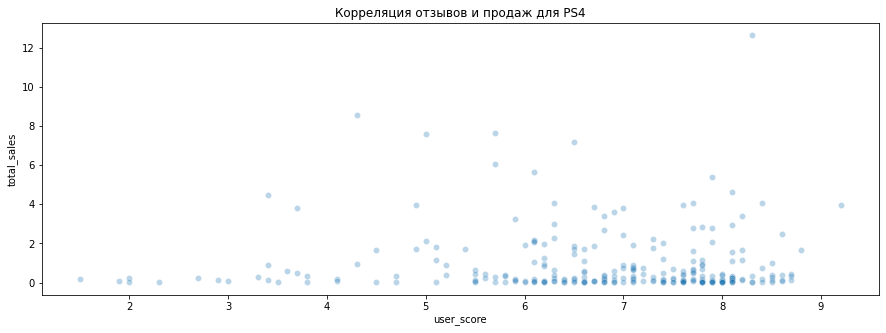

In [237]:
# Построим диаграмму рассеяния по корреляция отзывов пользователей и продаж для PS4 
plt.figure(figsize=(15,5))
sns.scatterplot(data = ps4, x='user_score', y = 'total_sales', alpha = 0.3)
plt.title('Корреляция отзывов и продаж для PS4')

Вывод: Корреляция пользовательских отзывов и продаж для PS4 слабо отрицательная и ближе к нейтральной. Можно сказать, что как таковой связи между отзывами пользователей и продажами нет.

In [238]:
# Посчитаем корреляцию между оценкой критиков и продажами для PS4
ps4 = actual_top_5[actual_top_5['platform'] == 'PS4']
ps4['critic_score'].corr(ps4['total_sales'])

0.40656790206178095

Text(0.5, 1.0, 'Корреляция оценки критиков и продаж для PS4')

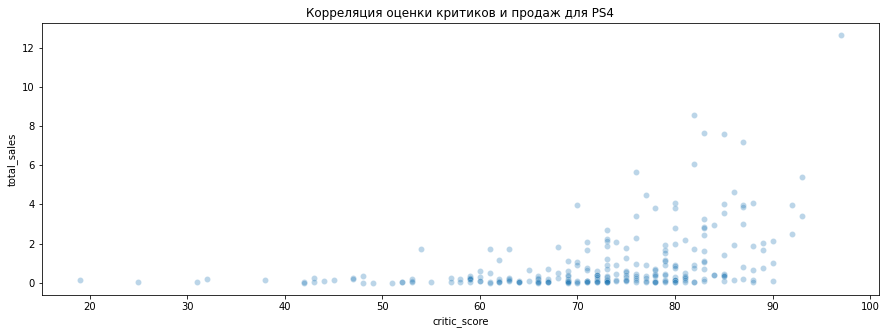

In [239]:
# Построим диаграмму рассеяния по корреляция оценки критиков и продаж для PS4 
plt.figure(figsize=(15,5))
sns.scatterplot(data = ps4, x='critic_score', y = 'total_sales', alpha = 0.3)
plt.title('Корреляция оценки критиков и продаж для PS4')

Вывод: Корреляция везде очень слабая. Получается, что при таких результатах можно смело утверждать, что зависимости продаж от оценок критиков и пользователей нет

#### Соотнесите выводы с продажами игр на других платформах.

Для сравнения возьмем несколько актуальных платформ. 

XOne, X360, PS3, 3DS

In [240]:
# Посчитаем корреляцию между отзывами пользователей и продажами для XOne
xone = actual_top_5[actual_top_5['platform'] == 'XOne']
xone['user_score'].corr(xone['total_sales'])

-0.06892505328279414

Text(0.5, 1.0, 'Корреляция отзывов и продаж для XOne')

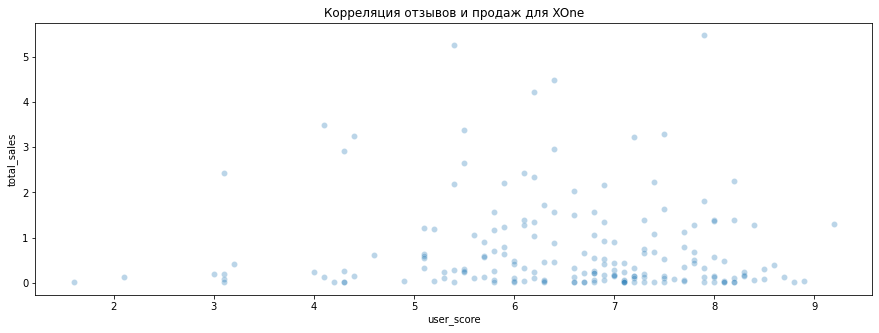

In [241]:
# Построим диаграмму рассеяния по корреляция отзывов пользователей и продаж для XOne
plt.figure(figsize=(15,5))
sns.scatterplot(data = xone, x='user_score', y = 'total_sales', alpha = 0.3)
plt.title('Корреляция отзывов и продаж для XOne')

Вывод: Корреляция пользовательских отзывов и продаж для XOne слабо отрицательная и ближе к нейтральной. Можно сказать, что связи между отзывами пользователей и продажами нет.

In [242]:
# Посчитаем корреляцию между оценкой критиков и продажами для XOne
xone = actual_top_5[actual_top_5['platform'] == 'XOne']
xone['critic_score'].corr(xone['total_sales'])

0.4169983280084017

Text(0.5, 1.0, 'Корреляция оценки критиков и продаж для XOne')

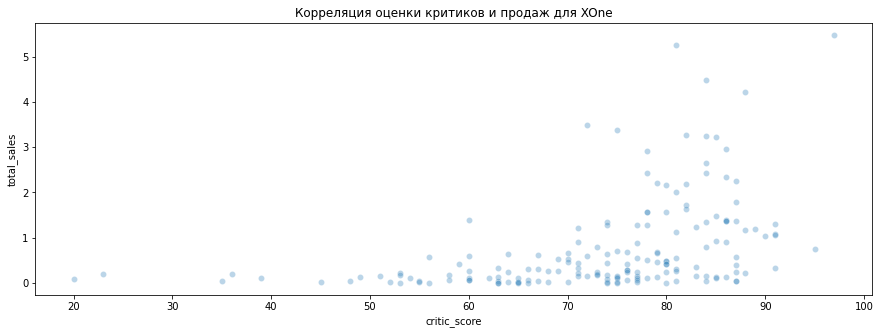

In [243]:
# Построим диаграмму рассеяния по корреляции оценки критиков и продаж для XOne
plt.figure(figsize=(15,5))
sns.scatterplot(data = xone, x='critic_score', y = 'total_sales', alpha = 0.3)
plt.title('Корреляция оценки критиков и продаж для XOne')

Вывод: Корреляция отзывов критиков и продаж для XOne слабо положительная. Объем продаж напрямую зависит от оценок критиков.

In [244]:
# Посчитаем корреляцию между отзывами пользователей и продажами для X360
x360 = actual_top_5[actual_top_5['platform'] == 'X360']
x360['user_score'].corr(x360['total_sales'])

-0.011742185147181342

Text(0.5, 1.0, 'Корреляция отзывов и продаж для X360')

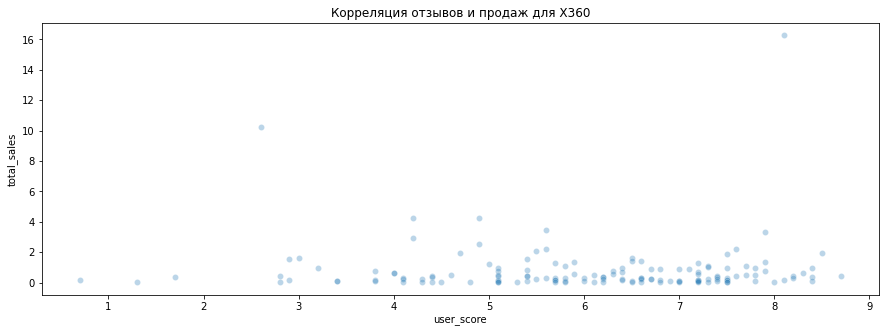

In [245]:
# Построим диаграмму рассеяния по корреляции отзывов пользователей и продаж для X360
plt.figure(figsize=(15,5))
sns.scatterplot(data = x360, x='user_score', y = 'total_sales', alpha = 0.3)
plt.title('Корреляция отзывов и продаж для X360')

Вывод: Корреляция пользовательских отзывов и продаж для X360 отрицательная и ближе к нейтральной. Связи между отзывами пользователей и продажами нет.

In [246]:
# Посчитаем корреляцию между оценкой критиков и продажами для X360
x360 = actual_top_5[actual_top_5['platform'] == 'X360']
x360['critic_score'].corr(x360['total_sales'])

0.3503445460228664

Text(0.5, 1.0, 'Корреляция оценки критиков и продаж для X360')

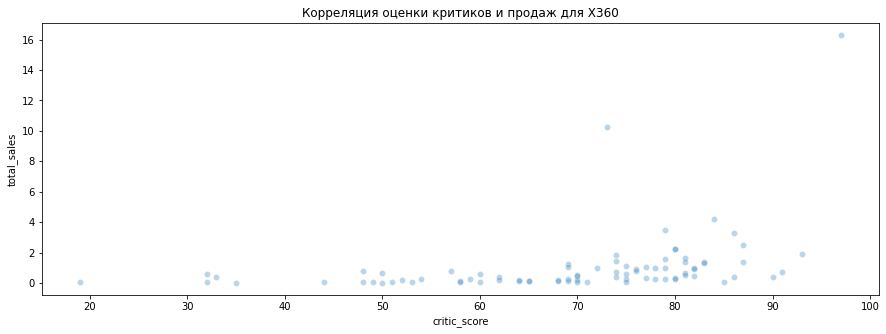

In [247]:
# Построим диаграмму рассеяния по корреляции оценки критиков и продаж для X360
plt.figure(figsize=(15,5))
sns.scatterplot(data = x360, x='critic_score', y = 'total_sales', alpha = 0.3)
plt.title('Корреляция оценки критиков и продаж для X360')

Вывод: Корреляция отзывов критиков и продаж для X360 положительная и присутствует слабая зависимость объема продаж от оценок критиков.

In [248]:
# Посчитаем корреляцию между отзывами пользователей и продажами для PS3
ps3 = actual_top_5[actual_top_5['platform'] == 'PS3']
ps3['user_score'].corr(ps3['total_sales'])

0.0023944027357566925

Text(0.5, 1.0, 'Корреляция отзывов и продаж для PS3')

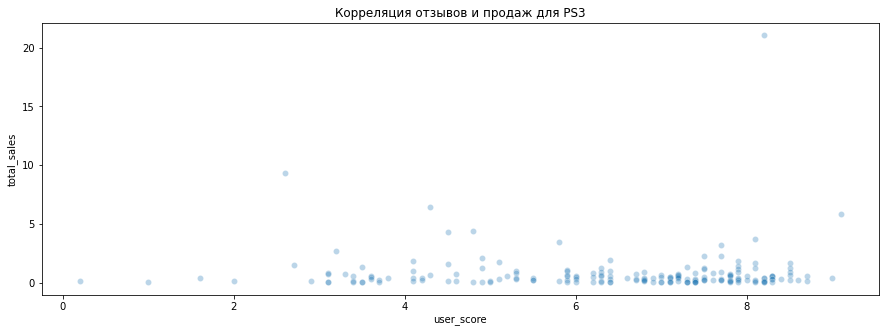

In [249]:
# Построим диаграмму рассеяния по корреляции отзывов пользователей и продаж для PS3
plt.figure(figsize=(15,5))
sns.scatterplot(data = ps3, x='user_score', y = 'total_sales', alpha = 0.3)
plt.title('Корреляция отзывов и продаж для PS3')

Вывод: Корреляция пользовательских отзывов и продаж для PS3 нейтральная, связи между отзывами пользователей и продажами нет.


In [250]:
# Посчитаем корреляцию между оценкой критиков и продажами для PS3
ps3 = actual_top_5[actual_top_5['platform'] == 'PS3']
ps3['critic_score'].corr(ps3['total_sales'])

0.3342853393371919

Text(0.5, 1.0, 'Корреляция оценки критиков и продаж для PS3')

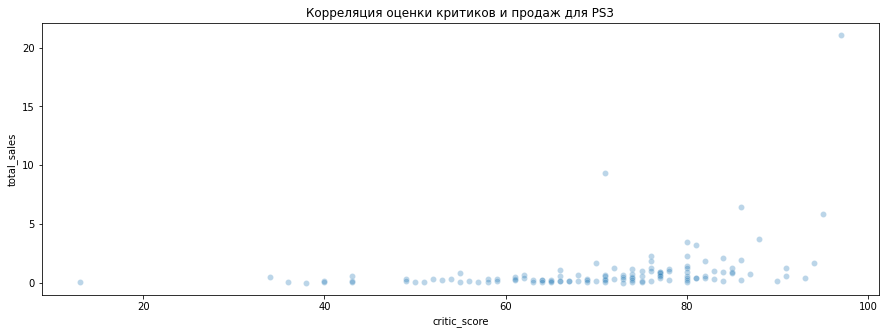

In [251]:
# Построим диаграмму рассеяния по корреляции оценки критиков и продаж для PS3
plt.figure(figsize=(15,5))
sns.scatterplot(data = ps3, x='critic_score', y = 'total_sales', alpha = 0.3)
plt.title('Корреляция оценки критиков и продаж для PS3')

Вывод: Корреляция отзывов критиков и продаж для PS4 слабо положительная. Можно сказать, что между ценками критиков и продажей игр присутствует незначительная прямая зависимость.

In [252]:
# Посчитаем корреляцию между отзывами пользователей и продажами для 3DS
ds3 = actual_top_5[actual_top_5['platform'] == '3DS']
ds3['user_score'].corr(ds3['total_sales'])

0.24150411773563016

Text(0.5, 1.0, 'Корреляция отзывов и продаж для 3DS')

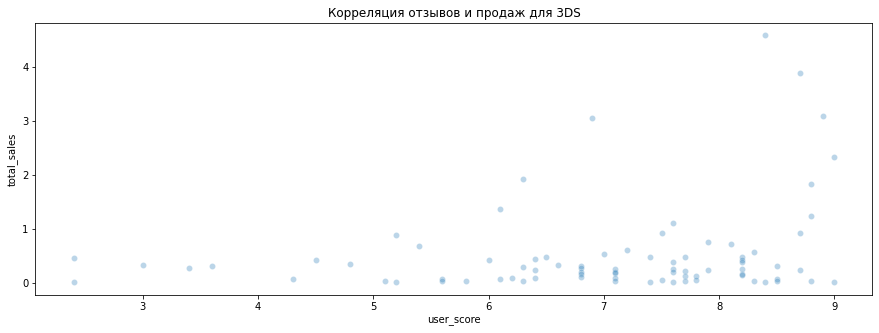

In [253]:
# Построим диаграмму рассеяния по корреляции отзывов пользователей и продаж для 3DS
plt.figure(figsize=(15,5))
sns.scatterplot(data = ds3, x='user_score', y = 'total_sales', alpha = 0.3)
plt.title('Корреляция отзывов и продаж для 3DS')

Вывод: Корреляция пользовательских отзывов и продаж для 3DS слабо положительная. Это говорит о том, что есть небольшая связь между отзывами пользователей и продажами.

In [254]:
# Посчитаем корреляцию между оценкой критиков и продажами для 3DS
ds3 = actual_top_5[actual_top_5['platform'] == '3DS']
ds3['critic_score'].corr(ds3['total_sales'])

0.3570566142288103

Text(0.5, 1.0, 'Корреляция оценки критиков и продаж для 3DS')

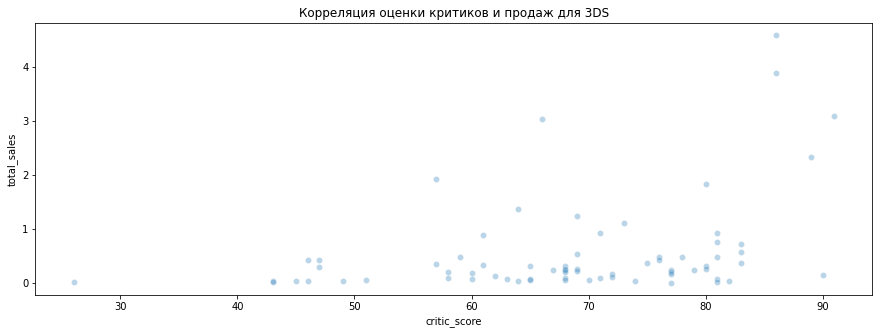

In [255]:
# Построим диаграмму рассеяния по корреляции оценки критиков и продаж для 3DS
plt.figure(figsize=(15,5))
sns.scatterplot(data = ds3, x='critic_score', y = 'total_sales', alpha = 0.3)
plt.title('Корреляция оценки критиков и продаж для 3DS')

Вывод: Корреляция отзывов критиков и продаж для 3DS слабо положительная. Это говорит о том, что имеется небольшая зависимость между оценкой критиков и продажей игр.

#### Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

<AxesSubplot:ylabel='total_sales'>

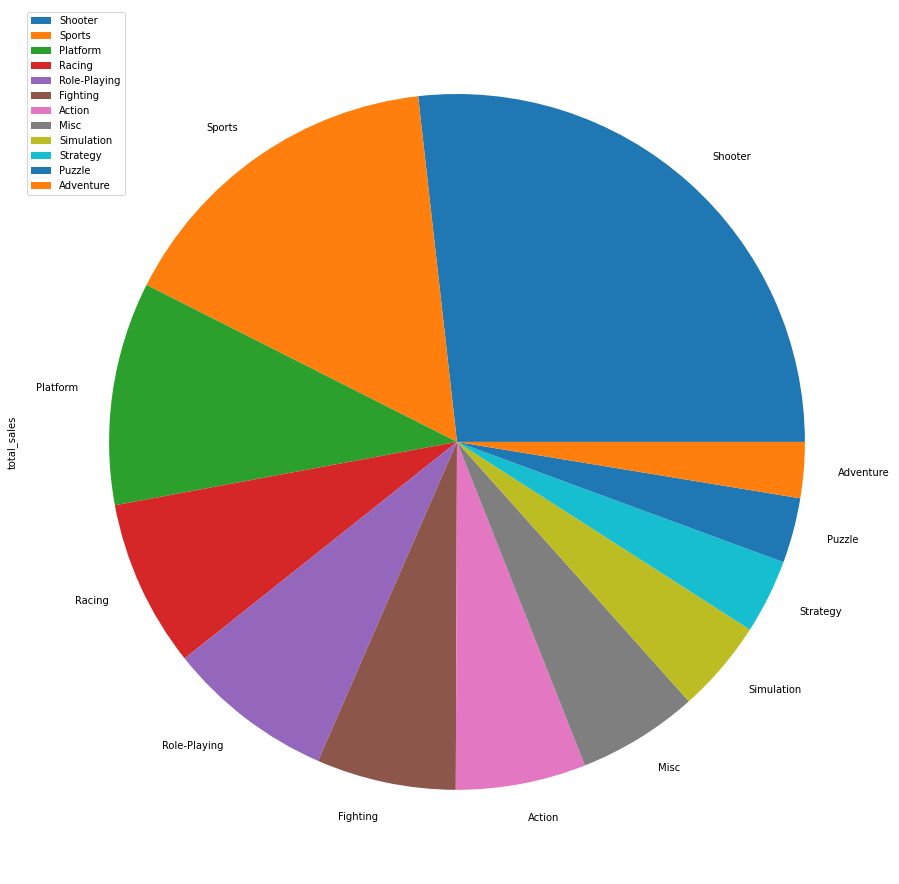

In [257]:
actual_top_5.pivot_table(
    index = 'genre', values = 'total_sales', aggfunc = 'median').sort_values(
    'total_sales', ascending = False).plot( y = 'total_sales', kind = 'pie', figsize = (16,16))

Вывод по исследовательскому анализу данных:

1. С 90-х годов начинается активрый рост развития игровой индустрии. С 1994 года стали регулярно выходить обновления для приставок, с интервалом примерно в 6-7 лет. Данные до 1994 года нам не важны и мы можем их объеденить с 1980 по 1993 годы, потому что до 1994 года новые игры выходили очень редко и без какой - либо четкой периодичности. Нам удалось установить, что 7 лет это средний срок жизни платформы. По графикам четко прослеживается динамика развития игровой индустрии, начиная с 2006г по 2011г выпускается больше всего игр.
Данные по всем периодам для нашего исследования не важны. Нам понадобятся данные только за последние несколько лет. Возьмем актуальный период с 2013г по 2016г.


2. Опираясь на диаграмму распределения, можно сказать, что в среднем платформа живет от 8 до 10 лет.
Топ 5 платформ, лидирующих в продажах за все время, теряют свою популярность к 2016 году.
Основная часть платформ из нашего списка уже не актуальна и остается всего несколько платформ: X360, PS3, PS4, PC, Nintendo 3DS, XOne, Nintendo WiiU, , PSV.


3. Для анализа был взят актуальный период с 2013 по 2016 год. 
Выбор этих периодов обусловлен обновлением поколений платформ. Средний период обновлений 6 лет. Но так как в последнем периоде у нас только половина этого срока, считаю логичным взять вторую половину жизнедеятельности платформ, вышедших в 2007 году, и первый период платформ вышедших в 2013 году.



4. Все игры идут на резкое снижение продаж начиная с 2014 года. По графику делаем вывод, что потенциально прибыльными платформами останутся PS4, XOne и 3DS, потому что только они демонстрируют хоть и не большие, но более стабильные продажи, чем все остальные платформы.



5. Больше всего глобальных продаж было у платформ: X360, PS4 и XOne.
XOne и PS4 находятся практически на одном уровне. Объяснить это можно тем, что данные приставки вышли на рунок позднее всех остальных.
Так же можно сделать вывод, что 3DS довольно сильно отстаёт и уступает приставкам последних поколений


6. В основном корреляция между пользовательскими отзывами и объемами продаж не наблюдается. Но также было замечено, что корреляция между отзывами критиков и объемом продажа слабо положительная, а значит отзывы критиков имеют небольшое влияние на то, как будут продаваться игры


7. Самые продаваемые игры, относятся к жанрам: Action, Shooter, Sports, Role - Playing.



### Шаг 4. Составьте портрет пользователя каждого региона
Определите для пользователя каждого региона (NA, EU, JP):

•	Самые популярные платформы (топ-5). Опишите различия в долях продаж.

•	Самые популярные жанры (топ-5). Поясните разницу.

•	Влияет ли рейтинг ESRB на продажи в отдельном регионе?


#### • Самые популярные платформы (топ-5). Опишите различия в долях продаж.

<AxesSubplot:xlabel='platform'>

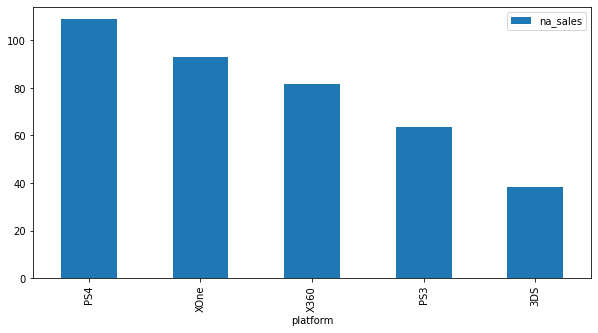

In [258]:
# Построим столбчатую диаграммму самых популярных платформ в Северной Америке 
actual_top_5.pivot_table(
    index = 'platform', values = 'na_sales', aggfunc = 'sum').sort_values(
    'na_sales', ascending = False).plot(kind = 'bar', figsize = (10,5))

Вывод: 

В Северной Америке пользователи отдают предпочтение PS4 и XOne. Платформы X360, PS3 и 3DS так же пользуются популярностью, но уже в меньшей степени.

<AxesSubplot:xlabel='platform'>

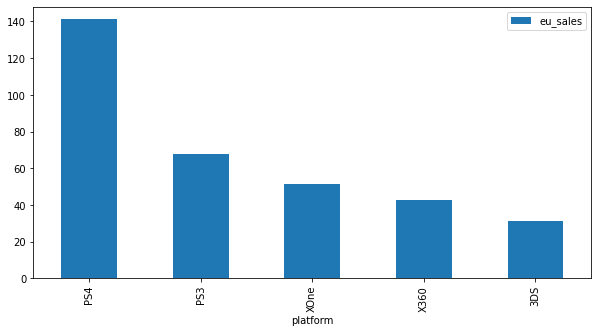

In [259]:
# Построим столбчатую диаграммму самых популярных платформ в Европе
actual_top_5.pivot_table(
    index = 'platform', values = 'eu_sales', aggfunc = 'sum').sort_values(
    'eu_sales', ascending = False).plot(kind = 'bar', figsize = (10,5))

Вывод:

Пользователи Европы предпочитают новую платформу PS4. Так же в Европе распространены платформы PS3, Xone, X360 и 3DS, но их популярность значительно меньше чем у PS4.

<AxesSubplot:xlabel='platform'>

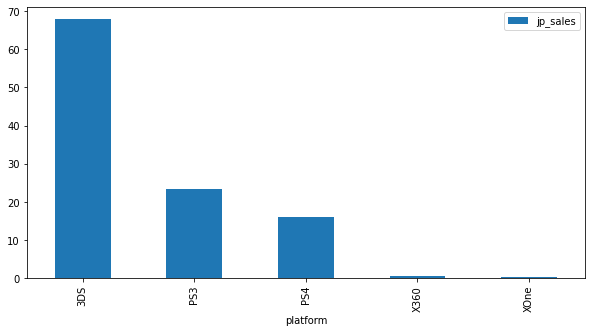

In [260]:
# Построим столбчатую диаграммму самых популярных платформ в Японии
actual_top_5.pivot_table(
    index = 'platform', values = 'jp_sales', aggfunc = 'sum').sort_values(
    'jp_sales', ascending = False).plot(kind = 'bar', figsize = (10,5))

Вывод:

Японские пользователи предпочитают использовать японские платформы 3DS. Затем с большим отставанием идут платформы PS3, PSV, PS4 и WiiU.

#### • Самые популярные жанры (топ-5). Поясните разницу.

In [261]:
# Сделаем сводную таблицу популярности игровых жанров в Северной Америке и отсортируем их по убыванию
actual_top_5.pivot_table(
    index = 'genre', values = 'na_sales', aggfunc = 'sum').sort_values(
    'na_sales', ascending = False)

,na_sales
genre,
Action,113.72
Shooter,103.89
Sports,63.64
Role-Playing,42.39
Misc,20.46
Fighting,12.09
Racing,9.64
Platform,8.91
Adventure,6.41


<AxesSubplot:xlabel='genre'>

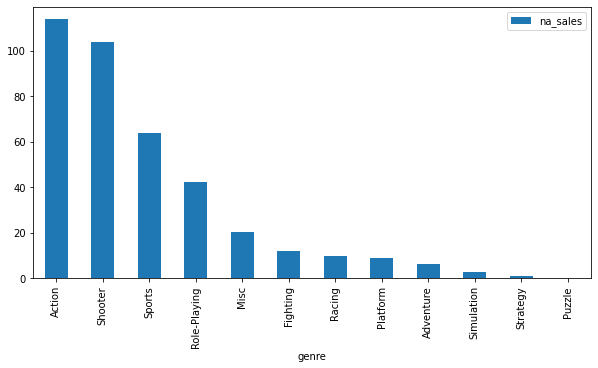

In [262]:
# Построим столбчатую диаграммму самых популярных жанров в Северной Америке 
actual_top_5.pivot_table(
    index = 'genre', values = 'na_sales', aggfunc = 'sum').sort_values(
    'na_sales', ascending = False).plot(kind = 'bar', figsize = (10,5))

In [263]:
# Сделаем сводную таблицу популярности игровых жанров в Европе и отсортируем их по убыванию
actual_top_5.pivot_table(
    index = 'genre', values = 'eu_sales', aggfunc = 'sum').sort_values(
    'eu_sales', ascending = False)

,eu_sales
genre,
Action,105.06
Shooter,79.99
Sports,56.38
Role-Playing,32.70
Racing,17.04
Misc,13.58
Platform,9.07
Adventure,6.97
Fighting,6.88


<AxesSubplot:xlabel='genre'>

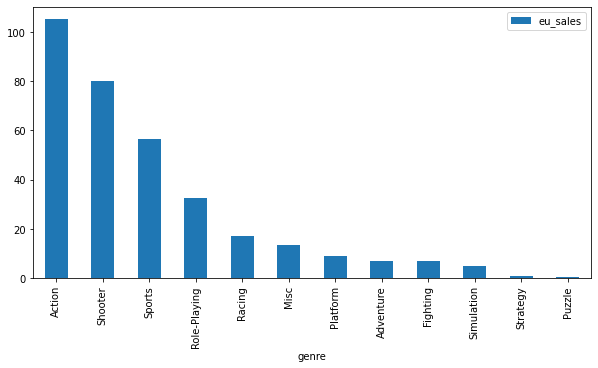

In [264]:
# Построим столбчатую диаграммму самых популярных жанров в Европе
actual_top_5.pivot_table(
    index = 'genre', values = 'eu_sales', aggfunc = 'sum').sort_values(
    'eu_sales', ascending = False).plot(kind = 'bar', figsize = (10,5))

In [265]:
# Сделаем сводную таблицу популярности игровых жанров в Японии и отсортируем их по убыванию
actual_top_5.pivot_table(
    index = 'genre', values = 'jp_sales', aggfunc = 'sum').sort_values(
    'jp_sales', ascending = False)

,jp_sales
genre,
Role-Playing,42.50
Action,32.82
Fighting,5.98
Shooter,5.02
Misc,4.95
Simulation,4.48
Sports,3.68
Adventure,3.17
Platform,2.34


<AxesSubplot:xlabel='genre'>

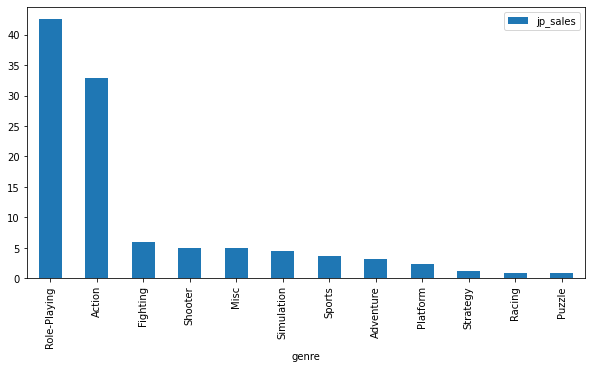

In [266]:
# Построим столбчатую диаграммму самых популярных жанров в Японии
actual_top_5.pivot_table(
    index = 'genre', values = 'jp_sales', aggfunc = 'sum').sort_values(
    'jp_sales', ascending = False).plot(kind = 'bar', figsize = (10,5))

Вывод:

В Северной Америке и Европе пользователи отдают предпочтение одним и тем же игровым платформам и жанрам. Самые популярные жанры: Action, Sports, Shooter.

Японские пользователи предпочитают портативные платформы, которые не привязывают пользователя к конкретному месту и позволяют играть в любом месте в любое время. С динамичным ритмом жизни они выбирают такие жанры как Role-Playing и Action.  

#### • Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [267]:
# Посмотрим как рейтинг ESRB влияет на продажи в отдельных регионах на протяжении всего времени
games['region'] = games['na_sales'] + games['eu_sales'] + games['jp_sales']

esrb = games.pivot_table(index = 'rating', values = ['na_sales', 'eu_sales', 'jp_sales'], aggfunc = 'sum')

esrb.sort_values(['na_sales', 'eu_sales', 'jp_sales'], ascending = False)

,eu_sales,jp_sales,na_sales
rating,,,
E,710.25,198.11,1292.99
unknown,613.30,841.93,1240.68
T,427.03,151.40,759.75
M,483.97,64.24,748.48
E10+,188.79,41.66,355.88
EC,0.11,0.00,1.53
AO,0.61,0.00,1.26
RP,0.08,0.00,0.00


In [268]:
# Посмотрим как рейтинг ESRB влияет на продажи топ 5 платформ в отдельных регионах 

actual_top_5['region'] = actual_top_5['na_sales'] + actual_top_5['eu_sales'] + actual_top_5['jp_sales']

esrb = actual_top_5.pivot_table(index = 'rating', values = ['na_sales', 'eu_sales', 'jp_sales'], aggfunc = 'sum')

esrb.sort_values(['na_sales', 'eu_sales', 'jp_sales'], ascending = False)

,eu_sales,jp_sales,na_sales
rating,,,
M,133.07,12.45,156.75
unknown,69.84,67.73,81.50
E,69.06,9.56,65.57
T,33.63,14.91,43.06
E10+,28.37,3.32,38.34


Вывод. Составим портрет пользователя по каждому региону.

1. Северная Америка.

Самые популярные гровые платформы: PS4 и XOne. Платформы X360, PS3 и 3DS так же пользуются популярностью, но уже в меньшей степени.
Топ 5 жанров: Action, Shooter, Sports, Role-Playing, Misc. 
Самый распространенные рейтинг ESRB за все время: Е, Т, М.
Самый распространенные рейтинг ESRB за период с 2013 по 2016 годы: М и Е.
    
2. Европа.

Самые популярные гровые платформы: PS4. Так же в Европе распространены платформы PS3, Xone, X360 и 3DS, но их популярность значительно меньше.
Топ 5 жанров: Role-Playing, Action, Fighting, Shooter, Misc.
Самый распространенные рейтинг ESRB за все время: Е, Т, М.
Самый распространенные рейтинг ESRB за период с 2013 по 2016 годы: М и Е.

3. Япония.

Самые популярные гровые платформы: 3DS. Затем с большим отставанием идут платформы PS3, PSV, PS4 и WiiU.
Топ 5 жанров: Role-Playing, Action, Fighting, Shooter, Misc.	
Самый распространенные рейтинг ESRB за все время: Е, Т, М.
Самый распространенные рейтинг ESRB за период с 2013 по 2016 годы: Т и М.

*Платформы и рейтинги указаны по убыванию популярности в регионе.

In [269]:
def top_user_portrait(type_, r_sales, ax):
    sales = round((
        actual_top_5.groupby(type_).agg({r_sales : 'sum'}).sort_values(
            by = r_sales, ascending = False) / actual_top_5[r_sales].sum()) * 100, 1).head()
    sales.loc['other'] = 100 - sales.sum()
    sales.plot(kind = 'pie', y = r_sales, autopct = '%1.1f%%', ax = axes[ax], labels = sales.index.tolist(), legend = None)
    title = {'na_sales' : 'Северная Америка', 'eu_sales' : 'Европа', 'jp_sales' : 'Япония'}
    axes[ax].set_title(title[r_sales], fontsize = 15)
    axes[ax].set_ylabel('')   
    

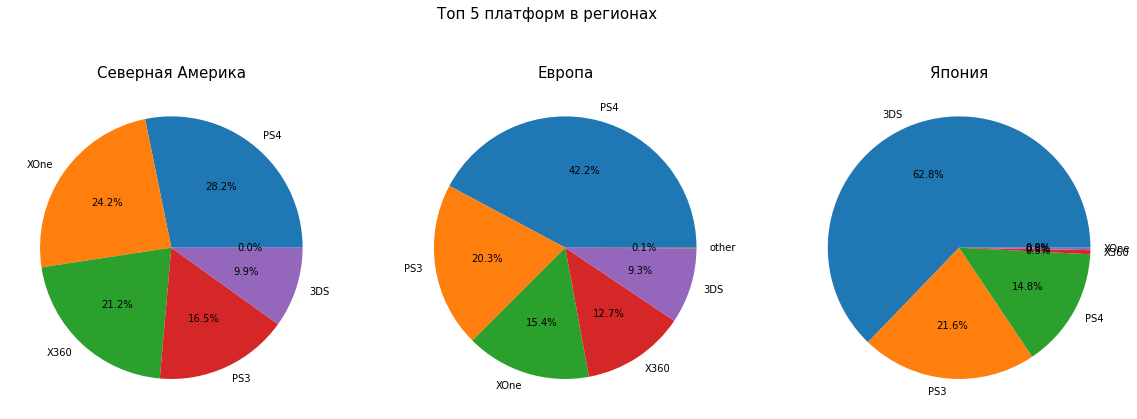

In [270]:
fig, axes = plt.subplots(1, 3, figsize = (20,7))
fig.suptitle('Топ 5 платформ в регионах', fontsize = 15)

top_user_portrait('platform', 'na_sales', 0)
top_user_portrait('platform', 'eu_sales', 1)
top_user_portrait('platform', 'jp_sales', 2)

In [271]:
def top_genre_portrait(type_, r_sales, ax):
    sales = round((
        actual_top_5.groupby(type_).agg({r_sales : 'sum'}).sort_values(
            by = r_sales, ascending = False) / actual_top_5[r_sales].sum()) * 100, 1).head()
    sales.loc['other'] = 100 - sales.sum()
    sales.plot(kind = 'pie', y = r_sales, autopct = '%1.1f%%', ax = axes[ax], labels = sales.index.tolist(), legend = None)
    title = {'na_sales' : 'Северная Америка', 'eu_sales' : 'Европа', 'jp_sales' : 'Япония'}
    axes[ax].set_title(title[r_sales], fontsize = 15)
    axes[ax].set_ylabel('') 

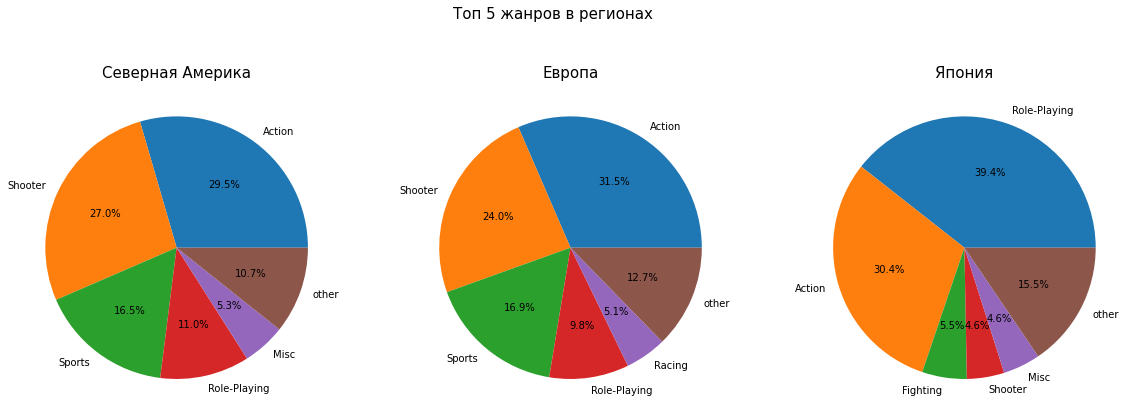

In [272]:
fig, axes = plt.subplots(1, 3, figsize = (20,7))
fig.suptitle('Топ 5 жанров в регионах', fontsize = 15)

top_genre_portrait('genre', 'na_sales', 0)
top_genre_portrait('genre', 'eu_sales', 1)
top_genre_portrait('genre', 'jp_sales', 2)

Составим портрет пользователя по каждому региону.
    

1. Северная Америка.
Самые популярные гровые платформы: PS4 и XOne. Платформы X360, PS3 и 3DS так же пользуются популярностью, но уже в меньшей степени. Топ 5 жанров: Action, Shooter, Sports, Role-Playing, Misc. 
    
Самый распространенные рейтинг ESRB за все время: Е, unknown, Т. 
    
Самый распространенные рейтинг ESRB за период с 2013 по 2016 годы: М, unknown и Е.

    
2. Европа.
Самые популярные гровые платформы: PS4. Так же в Европе распространены платформы PS3, Xone, X360 и 3DS, но их популярность значительно меньше. Топ 5 жанров: Role-Playing, Action, Fighting, Shooter, Misc. 
    
Самый распространенные рейтинг ESRB за все время: Е, unknown, Т. 
    
Самый распространенные рейтинг ESRB за период с 2013 по 2016 годы: М, unknown и Е.
    

3. Япония.
Самые популярные гровые платформы: 3DS. Затем с большим отставанием идут платформы PS3, PSV, PS4 и WiiU. Топ 5 жанров: Role-Playing, Action, Fighting, Shooter, Misc.
Самый распространенные рейтинг ESRB за все время: Е, unknown, Т. 
    
Самый распространенные рейтинг ESRB за период с 2013 по 2016 годы: М, unknown и Т.

*Платформы и рейтинги указаны по убыванию популярности в регионе.
    

### Шаг 5. Проверим гипотезы

•	Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

•	Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.


#### • Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Сформулируем нулевую и альтернативную гипотезы.

H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

H1: Средние пользовательские рейтинги платформ Xbox One и PC разные

In [273]:
# Посчитаем средний пользовательский рейтинг для платформ Xbox One и PC
xone_rating = actual_games[actual_games['platform'] == 'XOne']['user_score']
pc_rating = actual_games[actual_games['platform'] == 'PC']['user_score']

print('Средний пользовательский рейтинг Xbox One:', xone_rating.mean())
print('Средний пользовательский рейтинг PC:', pc_rating.mean())

Средний пользовательский рейтинг Xbox One: 6.521428571428572
Средний пользовательский рейтинг PC: 6.280379746835442


In [274]:
# Проверим первую гипотезу

alpha = .01
results = st.ttest_ind(xone_rating.dropna(), pc_rating.dropna(), equal_var = False)
print('p-значение', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')


p-значение 0.16174359801784316
Не получилось отвергнуть нулевую гипотезу


Отвергнуть нулевую гипотезу не удалось.Значение p-value равно 16%. Это явно слишком большая вероятностьБ чтобы делать вывод о сильном различии пользовательских рейтингов между платформами Xbox One и PC.

#### • Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Сформулируем нулевую и альтернативную гипотезы.

H0: Средние пользовательские рейтинги жанров Action и Sports одинаковые.

H1: Средние пользовательские рейтинги платформ Action и Sports разные

In [275]:
# Посчитаем средний пользовательский рейтинг для платформ Xbox One и PC
action_rating = actual_games[actual_games['genre'] == 'Action']['user_score']
sports_rating = actual_games[actual_games['genre'] == 'Sports']['user_score']

print('Средний пользовательский рейтинг Action:', action_rating.mean())
print('Средний пользовательский рейтинг Sports:', sports_rating.mean())

Средний пользовательский рейтинг Action: 6.8374999999999995
Средний пользовательский рейтинг Sports: 5.238124999999999


In [276]:
# Проверим первую гипотезу

alpha = .01
results = st.ttest_ind(action_rating.dropna(), sports_rating.dropna(), equal_var = False)
print('p-значение', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение 1.3883444596405356e-20
Отвергаем нулевую гипотезу


Получив p-value равное почти 1,4% мы отвергаем нулевую гипотезу. Вероятность получить одинаковые средние рейтинги по двум жанрам очень мала.

### Шаг 6. Общий вывод

Перед анализом мы выполнили подготовку данных. В рамках предобработки данных было выполнено следующее:

1. Привели названия столбцов к нижнему регистру.
2. В столбце Year_of_Release заполничи часть пропущенных значений и изменили тип данных с float на int.
3. В столбце User_Score изменили тип данных с object на float и заполнили значения tbd на nan. 
4. В столбце Rating для удобства заменили 'K-A' на 'E10+'. 'K-A' означает игры для детей и взрослых ("Kids to Adults").'E10+' означает игры для детей от 10 лет и старше.



Проведя исследовательский анализ сделали следующие выводы:


1.	С 90-х годов начинается активрый рост развития игровой индустрии. С 1994 года стали регулярно выходить обновления для приставок, с интервалом примерно в 6-7 лет. Данные до 1994 года нам не важны и мы можем их объеденить с 1980 по 1993 годы, потому что до 1994 года новые игры выходили очень редко и без какой - либо четкой периодичности. Нам удалось установить, что 7 лет это средний срок жизни платформы. По графикам четко прослеживается динамика развития игровой индустрии, начиная с 2006г по 2011г выпускается больше всего игр. Данные по всем периодам для нашего исследования не важны. Нам понадобятся данные только за последние несколько лет. Возьмем актуальный период с 2013г по 2016г.

2.	Опираясь на диаграмму распределения, можно сказать, что в среднем платформа живет от 8 до 10 лет. Топ 5 платформ, лидирующих в продажах за все время, теряют свою популярность к 2016 году. Основная часть платформ из нашего списка уже не актуальна и остается всего несколько платформ: X360, PS3, PS4, PC, Nintendo 3DS, XOne, Nintendo WiiU, , PSV.

3.	Для анализа был взят актуальный период с 2013 по 2016 год. Выбор этих периодов обусловлен обновлением поколений платформ. Средний период обновлений 6 лет. Но так как в последнем периоде у нас только половина этого срока, считаю логичным взять вторую половину жизнедеятельности платформ, вышедших в 2007 году, и первый период платформ вышедших в 2013 году.



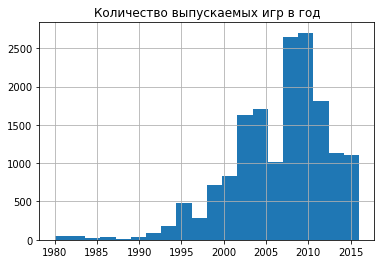

4.	Все игры идут на резкое снижение продаж начиная с 2014 года. По графику делаем вывод, что потенциально прибыльными платформами останутся PS4, XOne и 3DS, потому что только они демонстрируют хоть и не большие, но более стабильные продажи, чем все остальные платформы.


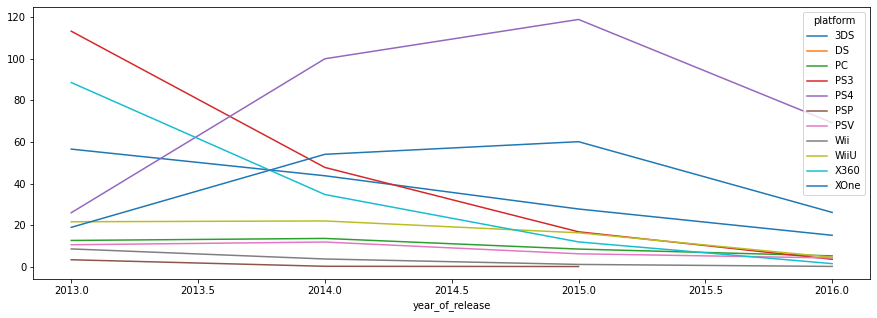

5.	Больше всего глобальных продаж было у платформ: X360, PS4 и XOne. XOne и PS4 находятся практически на одном уровне. Объяснить это можно тем, что данные приставки вышли на рунок позднее всех остальных. Так же можно сделать вывод, что 3DS довольно сильно отстаёт и уступает приставкам последних поколений

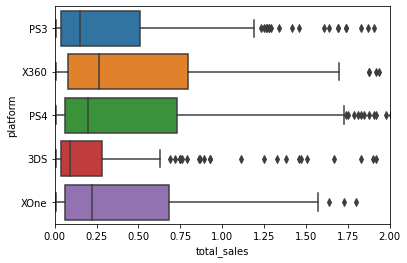

   
6. Корреляция оценок пользователей и критиков относительно продаж оказалась настолько мала, что при составлении прогнозов на 2017 год эти факторы можно не учитывать.
    
    
7. Так же мы определили, что самые продаваемые игры относятся к жанрам: Shooter, Sports, Platform, Racing, Role - Playing. На последнем месте Adventure и Puzzle.

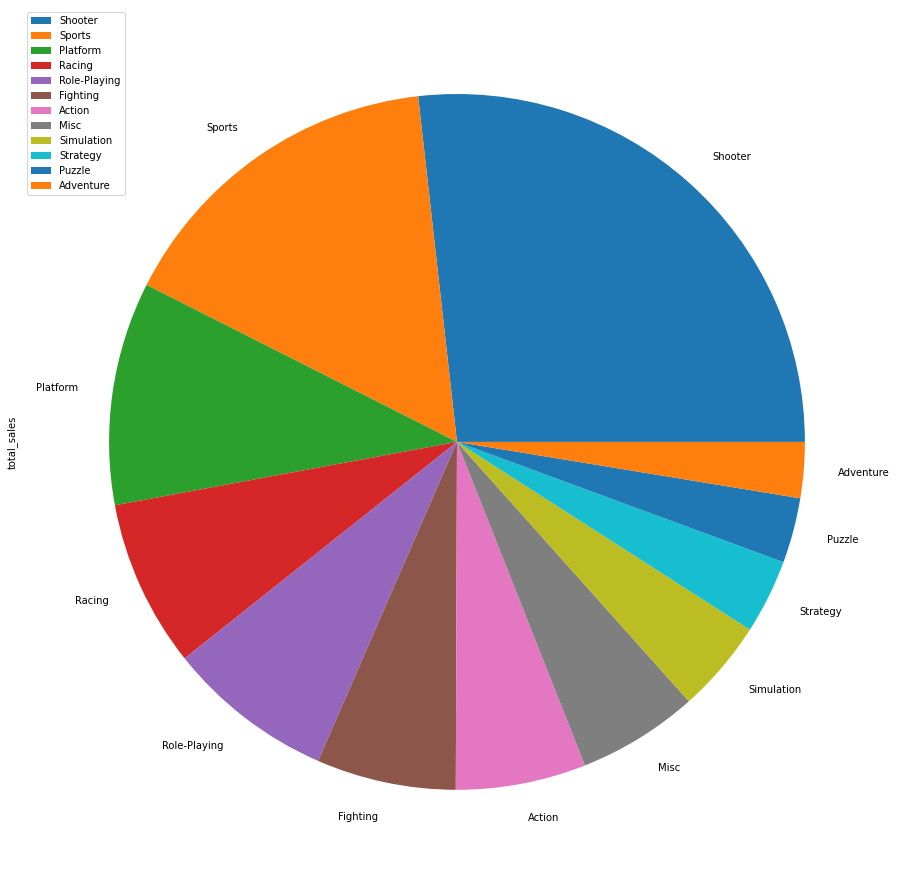

На основе общего анализа данных мы провели исследования и составили портрет пользователя для каждого региона.

1. Северная Америка.
    
Топ игровых платформ: PS4, XOne и X360. PS3 и 3DS так же пользуются популярностью, но уже в меньшей степени.

Топ 5 жанров: Action (Экшн), Shooter(Стрельба), Sports(Спортивные соревнования), Role-Playing(Ролевые игры).

Топ рейтингов ESRB: М(18+), Unknown(рейтинг не определен), и Е(6+).


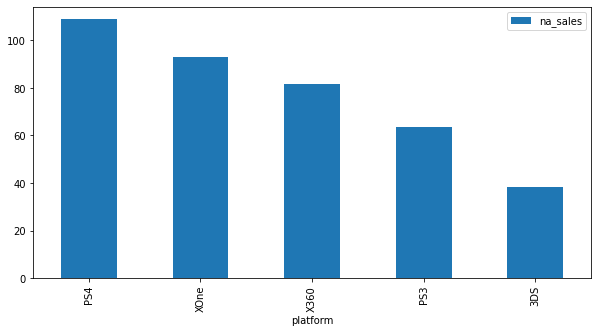

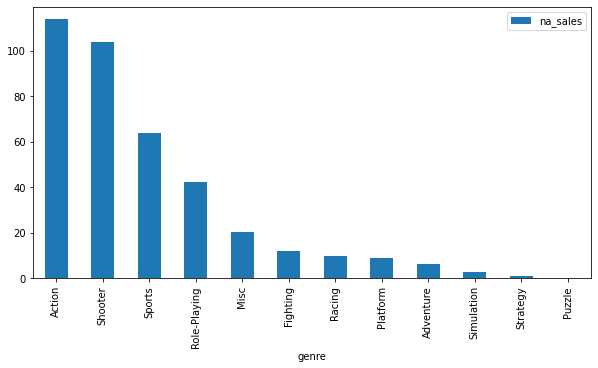

2. Европа.
    
Топ игровых платформ: PS4, PS3, Xone.

    
Топ 5 жанров: Action(Экшн), Shooter(Стрельба), Sports(Спортивные соревнования), Role-Playing(Ролевые игры).


Топ рейтингов ESRB: М(18+),  Unknown(рейтинг не определен) и Е(6+).

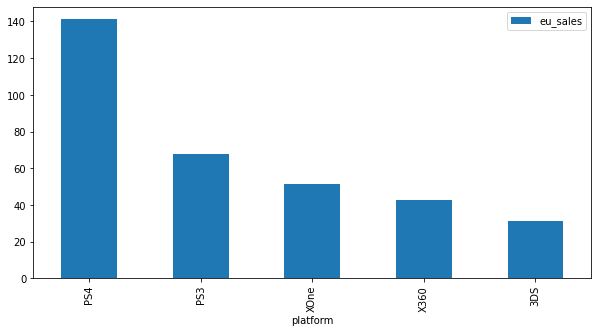

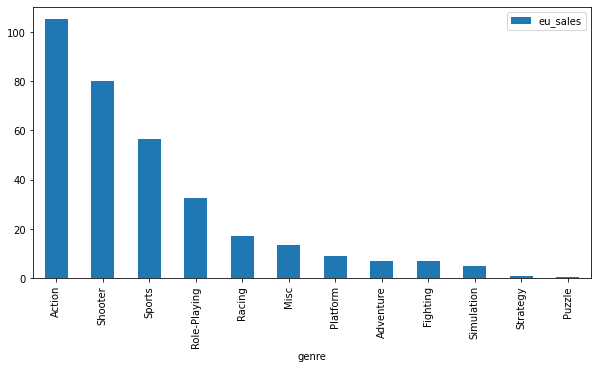

3. Япония
    
Топ игровых платформ: 3DS, PS3, PS4.

Топ 5 жанров: Role-Playing(Ролевые игры), Action(Экшн).

Топ рейтингов ESRB:М(18+), Unknown(рейтинг не определен), Т(16+).


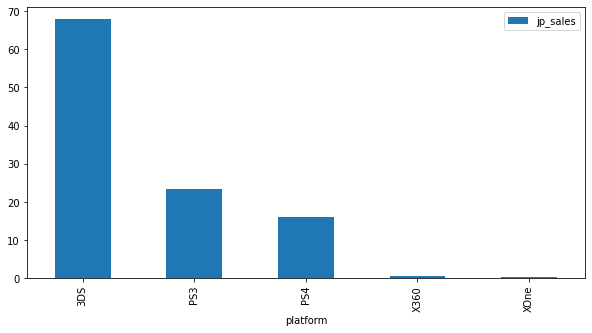

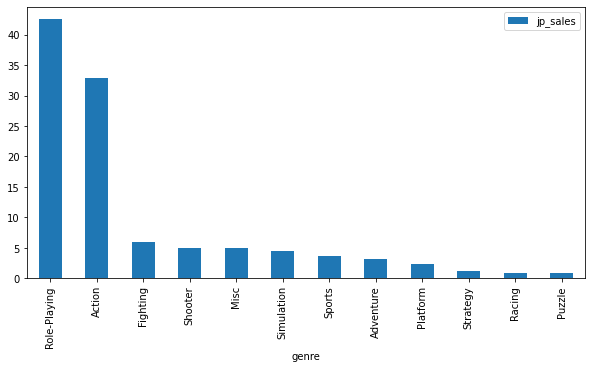

По итогам исследования можно составить прогноз на 2017 год.

1. Самыми популярными платформами на рынке остаются Sony Playstation 4 и Xbox One.


2. Среди жанров стоит одтать предпочтение Action(Экшн), Shooter(Стрельба) и Sports(Спортивные соревнования).


3. Так же стоит обратить внимание на рейтинг ESRB и присмотреться к категориям М(18+) и Е(6+).